<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faster R-CNN y YOLO V3

## FASTER R-CNN

### Problema 1: aprendisaje y estimación

In [ ]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [ ]:
!python train.py -p "annotation.txt"

Parsing annotation files

Using TensorFlow backend.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





2025-09-23 10:48:26.967550: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2






Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save\train_20250923-104803_config.pickle
-------------------------------
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
________________________________________________________________________

In [ ]:
!python predict.py -i "./kaggle_simpson_testset/d" -c "./save\train_20250923-104803_config.pickle"

pic_0001.jpg
[]
Elapsed time = 2.748029947280884[s]
pic_0002.jpg
[]
Elapsed time = 2.2032508850097656[s]
sideshow_bob_43.jpg
[]
Elapsed time = 2.202303647994995[s]
sideshow_bob_44.jpg
[]
Elapsed time = 2.188565492630005[s]
sideshow_bob_45.jpg
[]
Elapsed time = 2.202425956726074[s]
sideshow_bob_47.jpg
[]
Elapsed time = 2.2063534259796143[s]
sideshow_bob_48.jpg
[]
Elapsed time = 2.189257860183716[s]
sideshow_bob_49.jpg
[]
Elapsed time = 2.172084093093872[s]


Using TensorFlow backend.










2025-09-23 10:53:06.151004: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2






## Problema 2: Lectura del código

se observa que en las líneas 1-22 en **train.py** se realiza la importación de las librerías que son necesarias para crear y entrenar el modelo
- **faster_rcnn (linea-13):** es la base del modelo, en este se importa la librería que realiza RPN (Region Proposal Network) en **model/resnet.py (linea 196)** desliza una mini red sobre el mapa de caracter´sticas convolucionales para producir una serie de propuestas de region (bounding boxes), que presumiblemente contien objetos.
- **parser (linea-17):** es la parte en que se transforma los datos de un archivo.txt a un array de python, esto contiene: la ruta de lasimagene, las anotaciones (bbox) y el nombre de las clases en cadas anotación (en este caso personajes de los simpsons).
- **config (linea-15):** se utiliza para guardar las configuraciones del modelo en una clase de python.
- **data_geneartor (linea-15):** en esta librería se encuentra la parte del código que calcula los anchors boxes.
- **roi_helpers (linea-18):** en esta librería se calcula la Intersección sobre Unión (IoU) que es la métrica fundamental para cuantificar la superposición entre las regiones predichas y las de verdad fundamental en la detección y segmentación de objetos.
- **RoiPooling:** Las capas de agrupación de RoI dividen una ventana rectangular en un conjunto de subventanas y, posteriormente, realizan la agrupación máxima en cada subventana. La capa de agrupación de RoI realiza una operación de agrupación máxima en cualquier RoI propuesto de una imagen individualmente. Se encuentra en **model/RoiPoolingConv** y es llamado en **resnet.py (linea 16)** .

## YOLO V3

### Problema 3: Estimación por pesos aprendidos

In [ ]:
!python ../keras-yolo3-master/convert.py ../keras-yolo3-master/yolov3.cfg ../keras-yolo3-master/yolov3.weights yolo.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

Using TensorFlow backend.






2025-09-23 14:58:27.632003: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2








In [ ]:
!cd kerasyolo3master

In [ ]:
%%writefile detect_headless.py
import numpy as np
from kerasyolo3master.yolo import YOLO
from PIL import Image
import sys, os
import cv2

def detect_image(yolo, input_path, output_path):
    image = Image.open(input_path)
    r_image = yolo.detect_image(image)
    r_image.save(output_path)
    print(f"[INFO] Image detection complete -> {output_path}")

def detect_video(yolo, input_path, output_path):
    vid = cv2.VideoCapture(input_path)
    if not vid.isOpened():
        raise Exception(f"cannot open video {input_path}")

    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = vid.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print(f"[INFO] Processing video: {input_path}")
    while True:
        ret, frame = vid.read()
        if not ret:
            break

        image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        r_image = yolo.detect_image(image)
        result = cv2.cvtColor(np.array(r_image), cv2.COLOR_RGB2BGR)
        out.write(result)

    vid.release()
    out.release()
    print(f"[INFO] Video detection complete -> {output_path}")

if __name__ == "__main__":
    if len(sys.argv) < 4:
        print("Usage: python detect_headless.py <model_path> <input_path> <output_path>")
        sys.exit(1)

    model_path, input_path, output_path  = sys.argv[1], sys.argv[2], sys.argv[3]
    yolo = YOLO(model_path=model_path)

    if input_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        detect_image(yolo, input_path, output_path)

    elif input_path.lower().endswith(('.mp4', '.api', '.mov', '.mkv')):
        detect_video(yolo, input_path, output_path)
    else:
        print["[ERROR] Unsuported file format."]

Overwriting detect_headless.py


In [ ]:
!python detect_headless.py ./yolo.h5 cows.jpg output.jpg

./yolo.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 6 boxes for img
cow 0.50 (566, 178) (597, 208)
cow 0.89 (97, 196) (196, 317)
cow 0.91 (188, 190) (273, 329)
cow 0.94 (624, 197) (681, 288)
cow 1.00 (348, 191) (480, 312)
horse 0.37 (192, 198) (272, 331)
1.8498821000000003
[INFO] Image detection complete -> output.jpg


Using TensorFlow backend.



2025-09-23 20:15:34.251731: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2025-09-23 20:15:46.680931: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:533] remapper failed: Invalid argument: Subshape must have computed start >= end since stride is negative, but is 0 and 2 (computed from start 0 and end 9223372036854775807 over shape with rank 2 and stride-1)
2025-09-23 20:15:47.064882: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:533] remapper failed: Invalid argument: Subshape must have computed start >= end since stride is negative, but is 0 and 2 (computed from start 0 and end 9223372036854775807 over shape with rank 2 and stride-1)


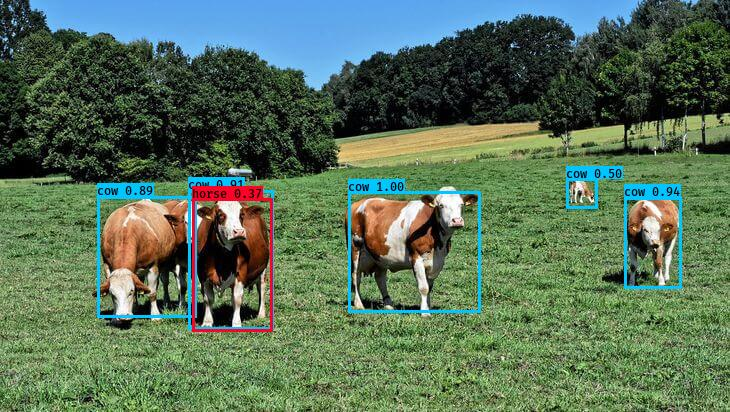

In [ ]:
from IPython.display import Image
Image('output.jpg')

In [ ]:
!python detect_headless.py ./yolo.h5 video_input.mp4 video_output.mp4

./yolo.h5 model, anchors, and classes loaded.
[INFO] Processing video: video_input.mp4
(416, 416, 3)
Found 27 boxes for img
traffic light 0.32 (506, 154) (515, 167)
traffic light 0.38 (603, 148) (615, 170)
traffic light 0.41 (331, 130) (338, 143)
traffic light 0.50 (397, 151) (405, 167)
traffic light 0.52 (225, 139) (236, 164)
traffic light 0.65 (221, 138) (240, 180)
traffic light 0.71 (539, 139) (557, 182)
truck 0.89 (222, 159) (354, 230)
bus 0.61 (472, 183) (547, 218)
car 0.34 (466, 185) (539, 219)
person 0.31 (38, 170) (597, 262)
person 0.34 (447, 178) (455, 201)
person 0.47 (6, 219) (30, 276)
person 0.48 (172, 203) (188, 245)
person 0.50 (606, 191) (618, 223)
person 0.55 (126, 207) (161, 292)
person 0.58 (329, 214) (354, 278)
person 0.70 (270, 209) (289, 265)
person 0.77 (153, 210) (170, 258)
person 0.80 (578, 178) (588, 203)
person 0.84 (32, 207) (55, 268)
person 0.89 (626, 197) (640, 247)
person 0.90 (57, 211) (79, 267)
person 0.91 (394, 186) (404, 211)
person 0.92 (82, 215) (104

Using TensorFlow backend.



2025-09-23 20:30:17.193443: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2025-09-23 20:30:29.199747: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:533] remapper failed: Invalid argument: Subshape must have computed start >= end since stride is negative, but is 0 and 2 (computed from start 0 and end 9223372036854775807 over shape with rank 2 and stride-1)
2025-09-23 20:30:29.567702: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:533] remapper failed: Invalid argument: Subshape must have computed start >= end since stride is negative, but is 0 and 2 (computed from start 0 and end 9223372036854775807 over shape with rank 2 and stride-1)



person 0.94 (17, 207) (43, 280)
person 0.95 (197, 184) (214, 234)
person 0.98 (313, 212) (336, 262)
0.43641480000002275
(416, 416, 3)
Found 32 boxes for img
traffic light 0.33 (448, 129) (457, 146)
traffic light 0.42 (615, 138) (628, 160)
traffic light 0.49 (526, 136) (539, 158)
traffic light 0.60 (230, 126) (249, 171)
traffic light 0.61 (233, 128) (246, 153)
traffic light 0.78 (407, 139) (416, 155)
traffic light 0.91 (550, 128) (567, 172)
car 0.31 (313, 166) (334, 186)
car 0.38 (355, 246) (638, 360)
car 0.58 (327, 168) (351, 188)
bicycle 0.55 (264, 247) (289, 289)
bicycle 0.61 (315, 237) (334, 280)
person 0.45 (562, 181) (578, 222)
person 0.48 (518, 172) (527, 196)
person 0.49 (129, 196) (150, 271)
person 0.52 (595, 185) (606, 215)
person 0.56 (603, 183) (613, 216)
person 0.58 (215, 190) (232, 252)
person 0.62 (433, 172) (442, 198)
person 0.70 (424, 171) (435, 200)
person 0.71 (457, 171) (466, 193)
person 0.72 (68, 200) (91, 274)
person 0.78 (471, 170) (482, 200)
person 0.82 (617, 18

### Problema 4: Crear un archivo para el aprendisaje

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Paths
base_path = ""
old_ann_path = os.path.join(base_path, 'annotation.txt')
yolo_ann_path = os.path.join(base_path, 'annotation_yolo.txt')
train_path = os.path.join(base_path, 'train_yolo.txt')
val_path = os.path.join(base_path, 'val_yolo.txt')
classes_path = os.path.join(base_path, 'classes.txt')

# Loading old annotation file
df = pd.read_csv(old_ann_path, header=None)
df.columns = ["img_path", "x1", "y1", "x2", "y2", "label"]
# Getting unique classes and assing IDs
classes = sorted(df["label"].unique())
class_to_id = {c: i for i, c in enumerate(classes)}

# Saving classes.txt
with open(classes_path, 'w') as f:
    f.write('\n'.join(classes))

# Converting to yolo format
with open(yolo_ann_path, 'w') as fout:
    for _, row in df.iterrows():
        fout.write(f"{row['img_path']} {row['x1']},{row['y1']},{row['x2']},{row['y2']},{class_to_id[row['label']]}\n")

# Train/Val split
with open(yolo_ann_path) as f:
    lines = f.readlines()
train_lines, val_lines = train_test_split(lines, test_size=0.2, random_state=42)

with open(train_path, 'w') as f:
    f.writelines(train_lines)

with open(val_path, 'w') as f:
    f.writelines(val_lines)

print(f'[INFO] Classes saved to: {classes_path}')
print(f'[INFO] Full YOLO annotations: {yolo_ann_path}')
print(f'[INFO] Train split: {train_path}')
print(f'[INFO] Val split: {val_path}')

[INFO] Classes saved to: classes.txt
[INFO] Full YOLO annotations: annotation_yolo.txt
[INFO] Train split: train_yolo.txt
[INFO] Val split: val_yolo.txt


### Problema 5: Confirmación de que le modelo puede aprender

In [ ]:
code = """
import re

path = "kerasyolo3master/train.py"

with open(path, 'r') as f:
    code = f.read()

# replace paths
code = re.sub(r"annotation_path\\s*=\\s*'.*?'", "annotation_path = 'train_yolo.txt'", code)
code = re.sub(r"classes_path\\s*=\\s*'.*?'", "classes_path = 'classes.txt'", code)

# Add validation path
if "val_path" not in code:
    code = code.replace("annotation_path = 'train_yolo.txt'", "annotation_path = 'train_yolo.txt'\\n val_path = 'val_yolo.txt'")
# Fix val split to use file
code = re.sub(r"with open\\(annotation_path\\).*?lines\\s*=\\s*f\\.readlines\\(\\)",
              "with open(annotation_path) as f:\\n      train_lines = f.readlines()\\n  with open(val_path) as f:\\n        val_lines = f.readlines()",code, flags=re.S)

# Reduce epochs
code = re.sub(r"epochs\\s*=\\s*\\d+", "epochs=2", code)

# Save back
with open(path, "w") as f:
    f.write(code)
"""

with open ("patch_train_script.py", "w") as f:
    f.write(code)

In [ ]:
!python kerasyolo3master/train1.py

Create YOLOv3 model with 9 anchors and 20 classes.
Load weights yolo.h5.
Freeze the first 249 layers of total 252 layers.
Train on 5680 samples, val on 631 samples, with batch size 100.
Epoch 2/2

11/56 [====>.........................] - ETA: 32:34 - loss: 6602.2013


Using TensorFlow backend.








2025-09-24 09:35:57.993007: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2





c:\Users\OMC\Documents\DProClass\python379\lib\site-packages\keras\engine\saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 75) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
c:\Users\OMC\Documents\DProClass\python379\lib\site-packages\keras\engine\saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((75,) vs (255,)).
  weight_values[i].shape))
c:\Users\OMC\Documents\DProClass\python379\lib\site-packages\keras\engine\saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 75) vs (255, 512, 1, 1)).
  weight_values[i].shape))
c:\Users\OMC\Documents\DProClass\python379\lib\site-packages\keras\engine\saving.py

### Problema 6: Lectura del código

Partes importantes del documento de yolov3
1. Network Backbone: Darknet-53
    - Yolov3 utiliza Darknet-53 (53 capas convolucionales) como su pilar para la extracción de características. Utiliza bloques resifuales y normalización por lotes.
    - Esto corresponde a `def yolo_body(inputs, num_anchors, num_classes)` en el directorio **yolo3/model.py** que construye el modelo yolov3 basado en capas DarkNet-53 llamando a `DarknetConv2D_BN_Leaky()`.
2. Detección a tres escalas
    - Yolov3 predice a tres escalas de mapa de características (13x13, 26x26, 52x52) para objetos pequeños, medianos y grandes, mejorando así la detección de objetos pequeños.
    - esto corresponde a `def yolo_body()` en el directorio **yolo3/model.py** que ofrece tres salidas conectadas a detection heads (yolo_head()):
        * `y1 = yolo_head(f1, anchors[6:], num_classes, inpupt_shape)`
        * `y2 = yolo_head(f1, anchors[3:6], num_classes, inpupt_shape)`
        * `y3 = yolo_head(f1, anchors[0:3], num_classes, inpupt_shape)`
3. Codificación y decodificación de bounding box
    - Yolov3 utiliza regresión logística para predicción de objetos y probabilidades de classes, ajustando las coordenas en relación a los bouding boxes
    - esto está implementado en las funciones de `yolo_head(feats, anchors, num_classes, input_shape)` y `yolo_correct_boxes` en el directorio **yolo3/model.py** esto convierte la salida de la red en predicciones de cuadros, objetos y puntaje de clases y convierte las coordenadas de cuadros en coordenadas de la imagen real alternativamente.

4. Anchors Boxes
    - yolov3 emplea 9 anclajes predefinidos agrupados en 3 escalas
    - esto está implementado en **model_data/yolo_anchors.txt** y `get_anchors()` función en **train.py** que carga tamños de anclaje y los remodela para detection heads.

5. Loss Function
    - Yolov3 combina las perdidas de las coordenadas, los objetos y las clasificaciones.
    - esto está implementado en `yolo_loss()` en el directorio **yolo3/model.py** que realiza cálculos de IoU (intersección sobre uion), ignora la mascara y combina diferentes componentes de pérdida:
    * xy_loss = ...
    * wh_loss = ...
    * confidence_loss = ...
    * class_loss = ...
    * loss = xy_loss + wh_loss + confidence_loss + class_loss
6. Supresón Non-Max (NMS):
    - Yolov3 suprime las cajas superpuestas  duplicadas con alto IoU.
    - esto se implementa en la función `yolo_eval()` funcion en **yolo3/model.py** que llama a `tf.image.non_max_supression()`. utilizado durante la inferencia (`yolo_video.py, predict.py`)
7. Aumento de datos
    - Yolov3 emplea cmabio de tamaño de imagen, volteo y distorciones de calor para mejorar la generalización.
    - esto se implementa en `def get_random_data()` en **yolov3/utils.py** que redimenciona, voltea, cambia el tono, saturación y aumento de brillo en las imágenes de entrenamiento.